# Comet profile

```{important}
under construction
```

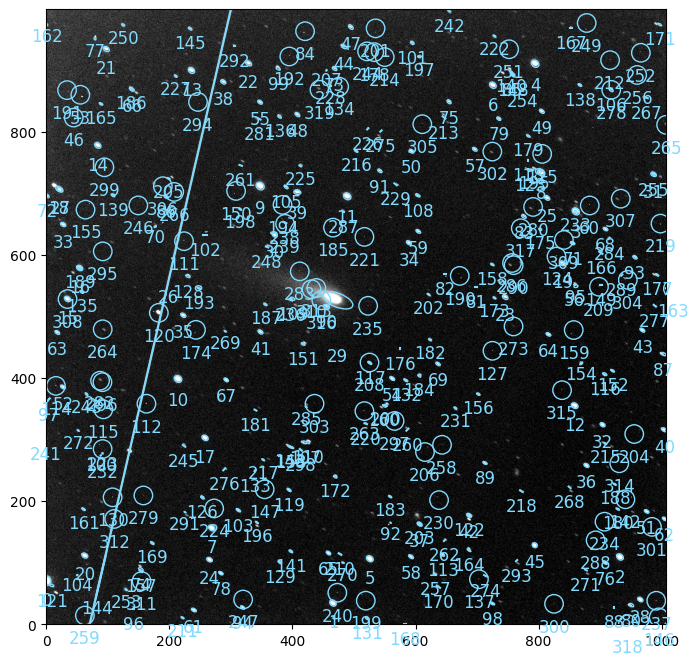

In [1]:
from prose import Sequence, FITSImage, blocks

image = FITSImage("/Users/lgrcia/data/0073P/0073P/TRAPPS.2022-08-22T23_35_35.490_calibrated.fits")

s = Sequence([
    blocks.Trim((20, 20)), # trimming
    blocks.AutoSourceDetection(threshold=7),   # detection of all sources
    blocks.CentroidGaussian2D(cutout=31)
])

s.run(image, show_progress=False)
image.show()

In [2]:
from prose import source
import numpy as np

# finding the comet, extended object with largest area
area = [s.area if isinstance(s, source.ExtendedSource) else 0 for s in image.sources]
i = int(np.argmax(area))
print(i)

29


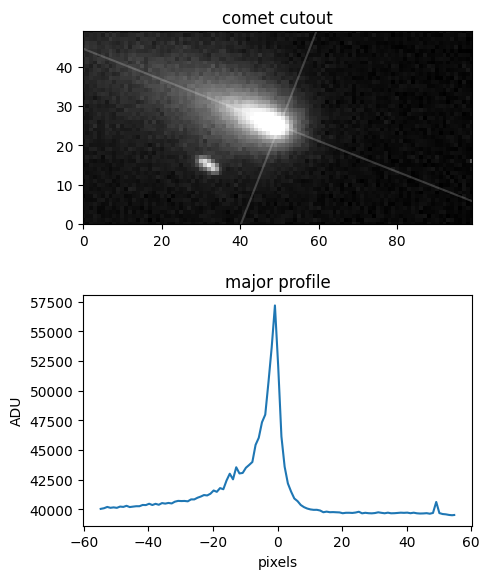

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))

ax = plt.subplot(211, title="comet cutout")
cutout = image.cutout(image.sources[i].coords, (50, 100))
comet = cutout.sources[0]
cutout.show(sources=False, ax=ax)
plt.axline(*comet.vertexes, alpha=0.2, c="w")
plt.axline(*comet.co_vertexes, alpha=0.2, c="w")

ax2 = plt.subplot(212, xlabel="pixels", ylabel="ADU", title="major profile")
ax2.plot(*cutout.major_profile(comet))
plt.tight_layout()

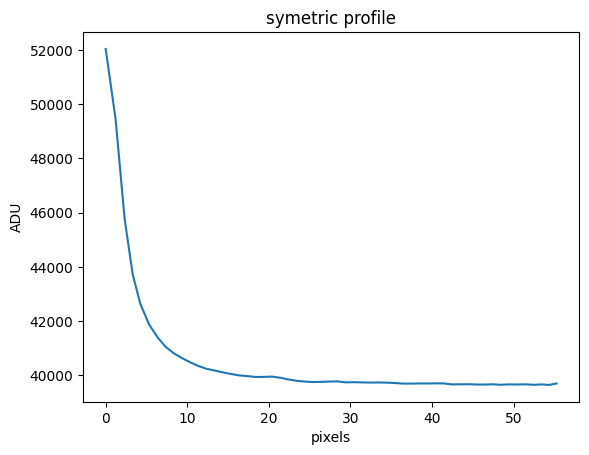

In [4]:
ax = plt.subplot(111, xlabel="pixels", ylabel="ADU", title="symetric profile")
ax.plot(*cutout.symetric_profile(cutout.sources[0]))